### Logistic Regession in sklearn
### Logistic Regression in NuralNet

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv('bank.csv')

In [71]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [72]:
df.job.unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [73]:
d={'admin.':1, 'technician':2, 'services':3, 'management':4, 'retired':12,
       'blue-collar':5, 'unemployed':6, 'entrepreneur':7, 'housemaid':8,
       'unknown':9, 'self-employed':10, 'student':11}

In [74]:
df['job'] = df['job'].map(d)

In [75]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,1,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,1,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,2,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,3,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,1,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [76]:
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [77]:
m={'married':1, 'single':2, 'divorced':3}

In [78]:
df['marital'] = df['marital'].map(m)

In [79]:
df['marital'].head()

0    1
1    1
2    1
3    1
4    1
Name: marital, dtype: int64

In [80]:
df.default.unique()

array(['no', 'yes'], dtype=object)

In [81]:
dff = {'no':0, 'yes':1}

In [82]:
df['default'] = df['default'].map(dff)

In [83]:
df['housing'] = df['housing'].map(dff)

In [84]:
df.deposit.unique()

array(['yes', 'no'], dtype=object)

In [85]:
df['deposit'] = df['deposit'].map(dff)

In [86]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,1,1,secondary,0,2343,1,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,1,1,secondary,0,45,0,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,2,1,secondary,0,1270,1,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,3,1,secondary,0,2476,1,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,1,1,tertiary,0,184,0,no,unknown,5,may,673,2,-1,0,unknown,1


In [87]:
df.education.unique()

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

In [88]:
edu={'secondary':1, 'tertiary':2, 'primary':3, 'unknown':0}

In [89]:
df['education'] = df['education'].map(edu)

In [90]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,1,1,1,0,2343,1,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,1,1,1,0,45,0,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,2,1,1,0,1270,1,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,3,1,1,0,2476,1,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,1,1,2,0,184,0,no,unknown,5,may,673,2,-1,0,unknown,1


In [91]:
df['loan'] = df['loan'].map(dff)

In [92]:
modified_df=df[['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan','day', 'duration','campaign', 'pdays', 'previous', 'deposit']]

In [93]:
modified_df.head()

,age,job,marital,education,default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit
0,59,1,1,1,0,2343,1,0,5,1042,1,-1,0,1
1,56,1,1,1,0,45,0,0,5,1467,1,-1,0,1
2,41,2,1,1,0,1270,1,0,5,1389,1,-1,0,1
3,55,3,1,1,0,2476,1,0,5,579,1,-1,0,1
4,54,1,1,2,0,184,0,0,5,673,2,-1,0,1


In [94]:
X = modified_df.drop('education',axis=1)

In [95]:
X.head()

,age,job,marital,default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit
0,59,1,1,0,2343,1,0,5,1042,1,-1,0,1
1,56,1,1,0,45,0,0,5,1467,1,-1,0,1
2,41,2,1,0,1270,1,0,5,1389,1,-1,0,1
3,55,3,1,0,2476,1,0,5,579,1,-1,0,1
4,54,1,1,0,184,0,0,5,673,2,-1,0,1


In [96]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (result[feature_name]-min_value)/(max_value-min_value)
    return result

In [97]:
#X=normalize(X)

In [98]:
X.head()

,age,job,marital,default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit
0,59,1,1,0,2343,1,0,5,1042,1,-1,0,1
1,56,1,1,0,45,0,0,5,1467,1,-1,0,1
2,41,2,1,0,1270,1,0,5,1389,1,-1,0,1
3,55,3,1,0,2476,1,0,5,579,1,-1,0,1
4,54,1,1,0,184,0,0,5,673,2,-1,0,1


In [99]:
Y = df[['education']]

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.3)

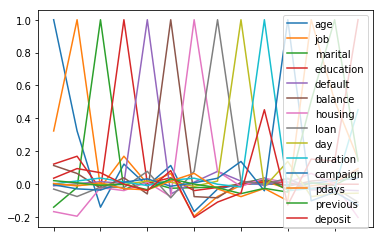

In [102]:
df.corr().plot()

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
model = LogisticRegression()

In [105]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [106]:
accuracy = model.score(x_test,y_test)

In [107]:
accuracy

0.5028366676619886

thats trrrible

array([1, 1, 1, ..., 1, 3, 3])

In [109]:
red={1:'admin.', 2:'technician', 3:'services', 4:'management', 12:'retired',
       5:'blue-collar', 6:'unemployed', 7:'entrepreneur', 8:'housemaid',
       9:'unknown', 10:'self-employed', 11:'student'}

In [124]:
pred = model.predict(x_test)

In [125]:
pr = pd.DataFrame(data=pred,columns=['target'])

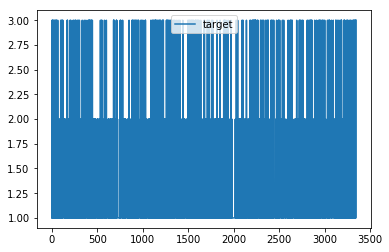

In [126]:
pr.plot()

In [127]:
pr['target']=pr['target'].map(red)

In [128]:
pr.head()

,target
0,admin.
1,admin.
2,admin.
3,services
4,admin.
